In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
cifar10_test_acc = []
cifar10_flops = []
cifar10_paras = []

cifar100_test_acc = []
cifar100_flops = []
cifar100_paras = []

ImageNet16_120_test_acc = []
ImageNet16_120_flops = []
ImageNet16_120_paras = []

In [3]:
with open('all_model.txt') as f:
    for line in f:
        line = line.rstrip()
        # print(line[0:19])
        if line[0:20] == 'cifar10        FLOP=':
            cifar10_flops.append(float(line[20:25]))
            cifar10_paras.append(float(line[37:41]))
        elif line[0:20] == 'cifar10        train':
            cifar10_test_acc.append(float(line[-7:-2]))
        
        elif line[0:20] == 'cifar100       FLOP=':
            cifar100_flops.append(float(line[20:25]))
            cifar100_paras.append(float(line[37:41]))
        elif line[0:20] == 'cifar100       train':
            cifar100_test_acc.append(float(line[-7:-2]))

        elif line[0:20] == 'ImageNet16-120 FLOP=':
            ImageNet16_120_flops.append(float(line[21:25]))
            ImageNet16_120_paras.append(float(line[37:41]))
        elif line[0:20] == 'ImageNet16-120 train':
            ImageNet16_120_test_acc.append(float(line[-7:-2]))


In [4]:
len(cifar100_flops)

15625

In [5]:
len(ImageNet16_120_test_acc)

15625

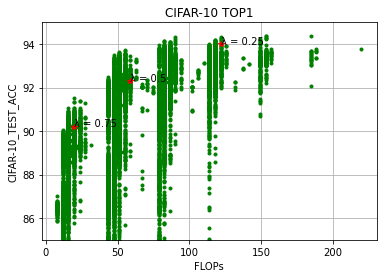

In [25]:
plt.plot(cifar10_flops, cifar10_test_acc, 'g.')
plt.xlabel('FLOPs')
plt.ylabel('CIFAR-10_TEST_ACC')
plt.title('CIFAR-10 TOP1')
plt.plot(121.82, 93.99, 'r*')
plt.text(121.82, 93.99,'λ = 0.25')
plt.plot(58.9, 92.31, 'r*')
plt.text(58.9, 92.31,'λ = 0.5')
plt.plot(19.58, 90.21, 'r*')
plt.text(19.58, 90.21,'λ = 0.75')
plt.grid(True)
plt.ylim([85, 95])
plt.savefig("myimg_1.svg")


In [18]:
cifar10_flops_normalized = preprocessing.normalize(np.array(cifar10_flops).reshape(1, -1))
cifar100_flops_normalized = preprocessing.normalize(np.array(cifar100_flops).reshape(1, -1))
ImageNet16_120_flops_normalized = preprocessing.normalize(np.array(ImageNet16_120_flops).reshape(1, -1))
Normlized_overall_flops = np.add(cifar10_flops_normalized, cifar100_flops_normalized, ImageNet16_120_flops_normalized)


In [23]:
Normlized_overall_flops.shape

(1, 15625)

In [25]:
cifar10_test_acc_normalized = preprocessing.normalize(np.array(cifar10_test_acc).reshape(1, -1))
cifar100_test_acc_normalized = preprocessing.normalize(np.array(cifar100_test_acc).reshape(1, -1))
ImageNet16_120_test_acc_normalized = preprocessing.normalize(np.array(ImageNet16_120_test_acc).reshape(1, -1))
Normlized_overall_test_acc = np.add(cifar10_test_acc_normalized, cifar100_test_acc_normalized, ImageNet16_120_test_acc_normalized)

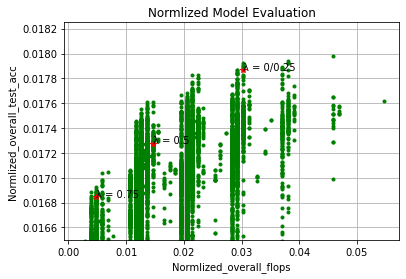

In [32]:
plt.plot(Normlized_overall_flops, Normlized_overall_test_acc, 'g.')
plt.xlabel('Normlized_overall_flops')
plt.ylabel('Normlized_overall_test_acc')
plt.title('Normlized Model Evaluation')
plt.plot(Normlized_overall_flops[:,857], Normlized_overall_test_acc[:,857], 'r*')
plt.text(Normlized_overall_flops[:,857], Normlized_overall_test_acc[:,857],'λ = 0/0.25')

plt.plot(Normlized_overall_flops[:,2564], Normlized_overall_test_acc[:,2564], 'r*')
plt.text(Normlized_overall_flops[:,2564], Normlized_overall_test_acc[:,2564],'λ = 0.5')

plt.plot(Normlized_overall_flops[:,485], Normlized_overall_test_acc[:,485], 'r*')
plt.text(Normlized_overall_flops[:,485], Normlized_overall_test_acc[:,485],'λ = 0.75')
plt.grid(True)
plt.ylim([0.0155, 0.01825])
plt.savefig("Normlized_Model_Evaluation_zoom_in.svg")